## Import Libraries

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Dataset Reading

In [526]:
dataset = pd.read_csv("user_behavior_dataset3.csv")
dataset.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [528]:
dataset.shape

(900, 11)

In [530]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     900 non-null    int64  
 1   Device Model                900 non-null    object 
 2   Operating System            900 non-null    object 
 3   App Usage Time (min/day)    900 non-null    int64  
 4   Screen On Time (hours/day)  900 non-null    float64
 5   Battery Drain (mAh/day)     900 non-null    int64  
 6   Number of Apps Installed    900 non-null    int64  
 7   Data Usage (MB/day)         900 non-null    int64  
 8   Age                         900 non-null    int64  
 9   Gender                      900 non-null    object 
 10  User Behavior Class         900 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [532]:
dataset.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.073462   
App Usage Time (min/day)   -0.073462                  1.000000   
Screen On Time (hours/day)  0.036055                  0.940046   
Battery Drain (mAh/day)    -0.068785                  0.956903   
Number of Apps Installed    0.022186                  0.944736   
Data Usage (MB/day)        -0.046375                  0.933942   
Age                        -0.102442                  0.019302   
User Behavior Class         0.064182                  0.943796   

                            Screen On Time (hours/day)  \
User ID                                       0.036055   
App Usage Time (min/day)                      0.940046   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.940028   
Number of Apps Installed                      0.946702   
Data Usage (MB/day)                           0.930452   

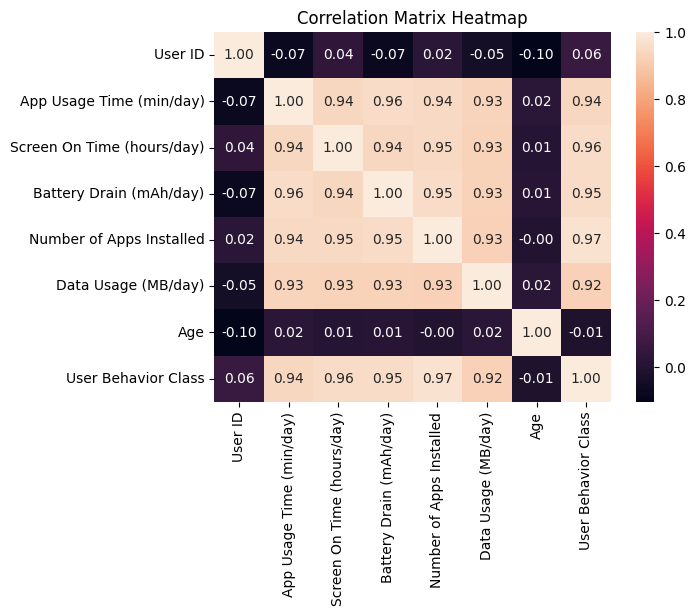

In [534]:
data_num = dataset.select_dtypes(include=["number"])
corr_matrix = data_num.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Visualization

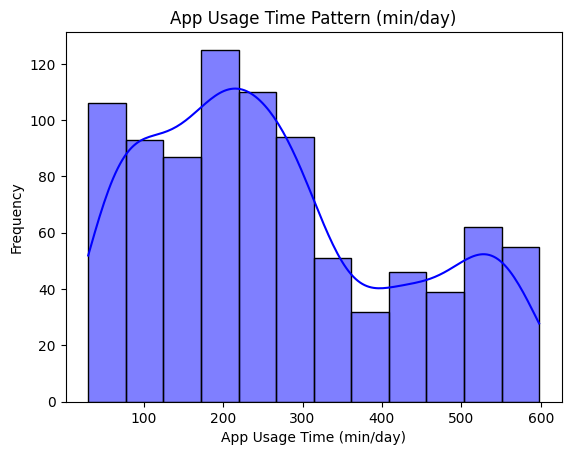

In [541]:
sns.histplot(dataset['App Usage Time (min/day)'], kde=True, color='blue')
plt.title('App Usage Time Pattern (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

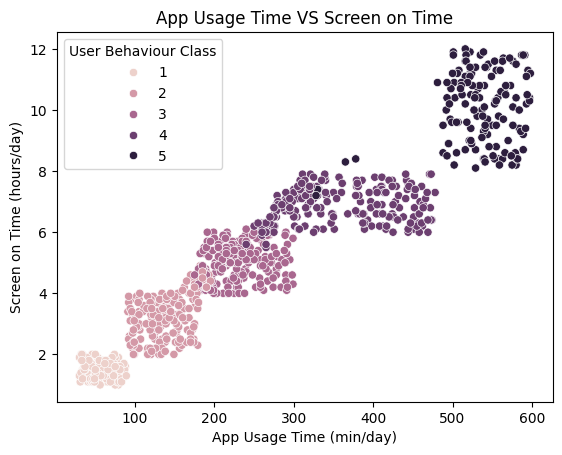

In [543]:
sns.scatterplot(x=dataset['App Usage Time (min/day)'], y=dataset['Screen On Time (hours/day)'], hue=dataset['User Behavior Class'])
plt.title('App Usage Time VS Screen on Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen on Time (hours/day)')
plt.legend(title='User Behaviour Class')
plt.show()

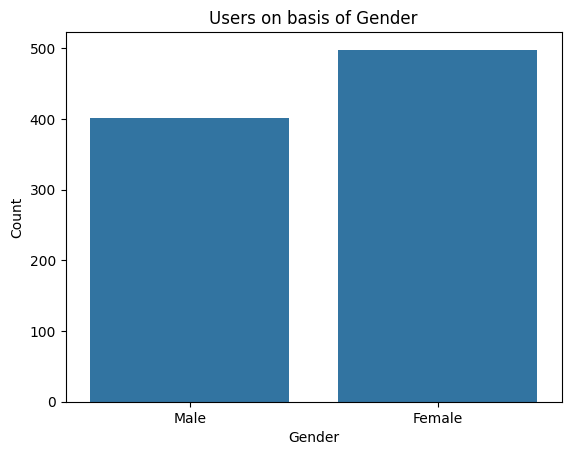

In [545]:
sns.countplot(x=dataset['Gender'])
plt.title('Users on basis of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Encoding and Train Test Split

In [548]:
encoder = LabelEncoder()

dataset['Gender'] = encoder.fit_transform(dataset['Gender'])
dataset['Operating System'] = encoder.fit_transform(dataset['Operating System'])

In [550]:
X = dataset.drop(columns=['User ID', 'Device Model', 'User Behavior Class'])
y = dataset['User Behavior Class']

In [552]:
X = dataset.iloc[:,3:10]
y = dataset.iloc[:,-1]

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [557]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [600]:
y_pred = model.predict(X_test)

## Model Accuracy, Confusion Matrix, Classification Report

In [562]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9666666666666667
Confusion Matrix: 
[[26  0  0  0  0]
 [ 0 33  2  0  0]
 [ 0  1 47  0  0]
 [ 0  0  2 39  0]
 [ 0  0  0  1 29]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.97      0.94      0.96        35
           3       0.92      0.98      0.95        48
           4       0.97      0.95      0.96        41
           5       1.00      0.97      0.98        30

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



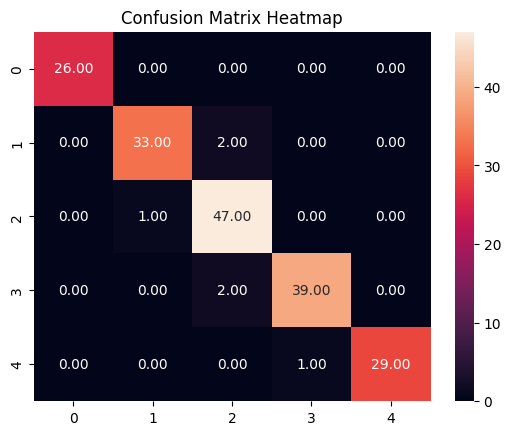

In [564]:
data_num = dataset.select_dtypes(include=["number"])
#print(corr_matrix)
c=confusion_matrix(y_test, y_pred)
sns.heatmap(c, annot=True, fmt=".2f")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [566]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [568]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(
    model, 
    X,
    y,
    cv=cv,
    scoring='accuracy'
)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Accuracy Scores: [0.98888889 0.99444444 0.97222222 0.98333333 0.97222222]
Mean Accuracy: 0.9822
Standard Deviation: 0.0089


In [569]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [570]:
new_data = {
    'Device Model': ['iPhone 11'],
    'App Usage Time (min/day)': [100],
    'Screen On Time (hours/day)': [5],
    'Battery Drain (mAh/day)': [1500],
    'Number of Apps Installed': [40],
    'Data Usage (MB/day)': [2000],
    'Age': [21],
    'Gender': ['Male']
}

In [598]:
new_df = pd.DataFrame(new_data)
new_df['Gender'] = encoder1.fit_transform(new_df['Gender'])

In [578]:
X_new = new_df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender']]

In [580]:
y_pred_new = model.predict(X_new)

In [582]:
print(f"User Behavior Class for the new data: {y_pred_new[0]}")

User Behavior Class for the new data: 2


In [584]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [586]:
numerical_features = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
]
categorical_features = ['Device Model', 'Operating System', 'Gender']
target_variable = 'User Behavior Class'

X = dataset[numerical_features + categorical_features]
y = dataset[target_variable]

In [588]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [592]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=200, random_state=42),
    'SVM': SVC(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

scores = {'precision': {}, 'recall': {}, 'f1-score': {}, 'accuracy': {}}


RandomForest Confusion Matrix:
accuracy 0.9777777777777777
precision 0.981400966183575
f1-score 0.9810101010101011
recall 0.9810101010101011


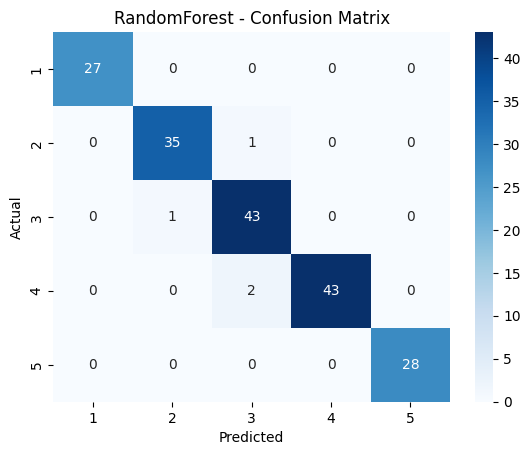


LogisticRegression Confusion Matrix:
accuracy 0.9777777777777777
precision 0.9833333333333332
f1-score 0.9815908946934984
recall 0.9811111111111112


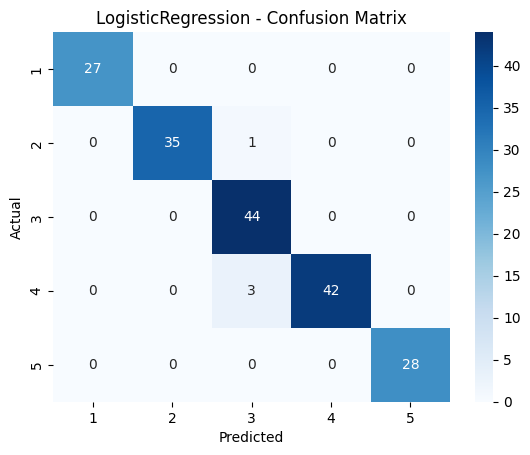


SVM Confusion Matrix:
accuracy 0.9777777777777777
precision 0.9833333333333332
f1-score 0.9815908946934984
recall 0.9811111111111112


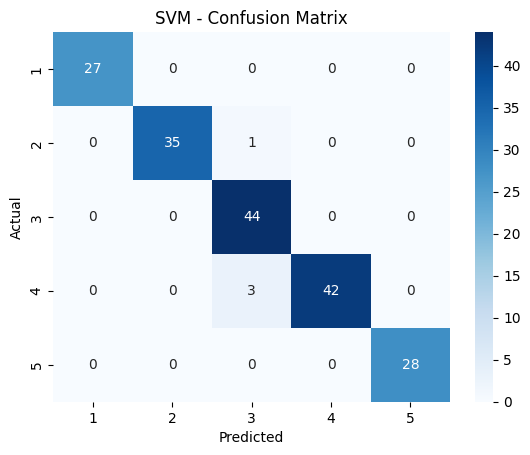


DecisionTree Confusion Matrix:
accuracy 0.95
precision 0.9565329017134566
f1-score 0.957023707611943
recall 0.9582828282828284


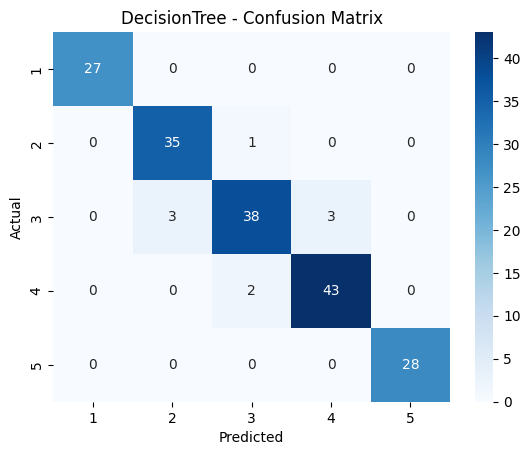


KNeighbors Confusion Matrix:
accuracy 0.9666666666666667
precision 0.9746212121212121
f1-score 0.9715192965315096
recall 0.9698989898989898


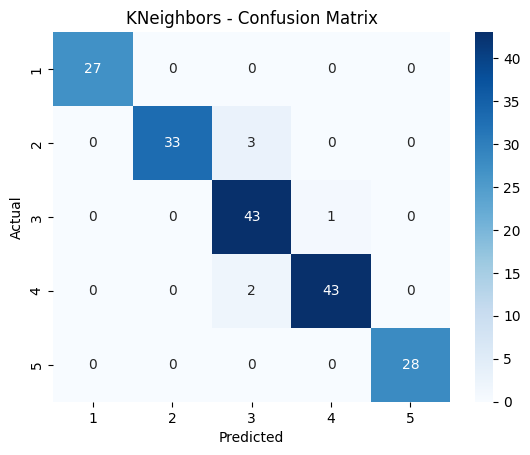

In [594]:
for name, clf in classifiers.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    try:
        # eğitim
        model.fit(X_train, y_train)
        # tahmin
        y_pred = model.predict(X_test)
        # Performans metriklerini hesaplama
        report = classification_report(y_test, y_pred, output_dict=True)
        scores['precision'][name] = report['macro avg']['precision']
        scores['recall'][name] = report['macro avg']['recall']
        scores['f1-score'][name] = report['macro avg']['f1-score']
        scores['accuracy'][name] = accuracy_score(y_test, y_pred)

        print(f"\n{name} Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f"{name} - Confusion Matrix")
        print("accuracy",accuracy_score(y_test, y_pred))
        print("precision",report['macro avg']['precision'])
        print("f1-score",report['macro avg']['f1-score'])
        print("recall",report['macro avg']['recall'])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
    except Exception as e:
        print(f"{name} başarısız oldu: {e}")

scores_df = pd.DataFrame(scores)

<Figure size 1200x600 with 0 Axes>

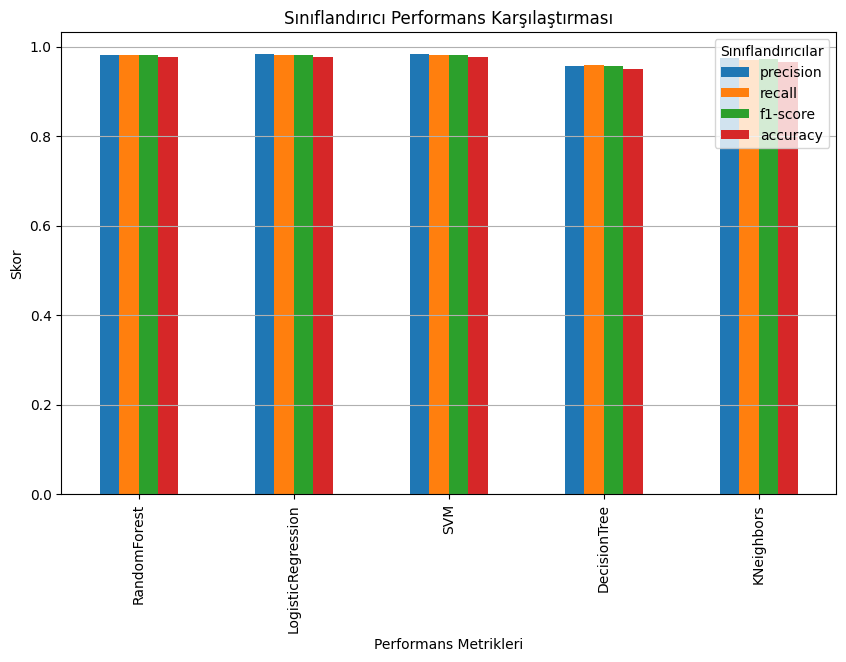

In [596]:
plt.figure(figsize=(12, 6))
scores_df.plot(kind='bar', figsize=(10, 6))
plt.title("Sınıflandırıcı Performans Karşılaştırması")
plt.xlabel("Performans Metrikleri")
plt.ylabel("Skor")
plt.legend(title="Sınıflandırıcılar")
plt.grid(axis='y')
plt.show()